# Clasificación de Iris

Tenemos un conjunto de datos con información de 3 plantas diferentes, con 5 columnas:
- Longitud del sépalo (cm)
- Ancho del sépalo (cm)
- Longitud del pétalo (cm)
- Ancho del pétalo (cm)
- Clase:
    0. Iris Setosa
    1. Iris Versicolour
    2. Iris Virginica

## Sépalo y Pétalo
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c5/P%C3%A9talo-s%C3%A9palo.jpg" alt="sepapeta" class="bg-primary mb-1" width="200px">

## Clases
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="setosa" class="bg-primary mb-1" width="200px">

Iris setosa

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/320px-Iris_versicolor_3.jpg" alt="versi" class="bg-primary mb-1" width="200px">

Iris versicolor

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" alt="virginica" class="bg-primary mb-1" width="200px">

Iris virginica

**Qué pasa si me dan los datos de una flor y queremos saber qué clase de Iris es?**

In [1]:
# Importemos librerías que vamos a usar
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Primero leemos los datos, si vemos el archivo en el navegador,
# encontramos que los valores están separados por comas, podemos darle eso a loadtxt.
datos = np.loadtxt(
    "https://raw.githubusercontent.com/lbiedma/an2famaf2020/master/datos/iris.data",
    delimiter=",",
)
datos.shape

(150, 5)

In [10]:
# Separemos nuestros datos y sus clasificaciones.
medidas = datos[:, :-1]
clases = datos[:,-1].astype(int)

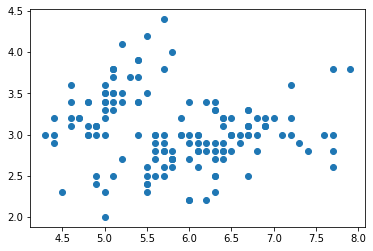

In [9]:
# Hagamos un primer plot de las primeras 2 coordenadas de los datos (ancho y largo de sépalo)
plt.scatter(datos[:,0], datos[:, 1])

Siguiendo la guía de https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/ podemos darle el color de cada clase a cada punto.

In [11]:
colores = np.array(['r', 'g', 'b'])
colores[clases]

array(['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b'], dtype='<U1')

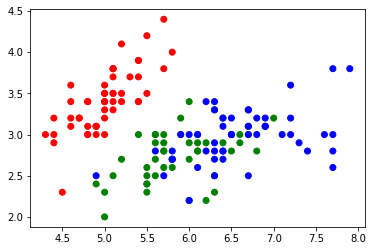

In [16]:
plt.scatter(medidas[:,0], medidas[:, 1], c=colores[clases])

Si quisieramos separar estos valores por rectas para generar una clasificación automática, notamos que solamente con estas 2 coordenadas no podemos hacer una buena separación de verdes y azules, pero podemos aplicar **análisis de componentes principales** (PCA) a los datos, que no es otra cosa que hacer la descomposición SVD y usar las primeras 2 columnas de U.

In [17]:
u, s, vt = np.linalg.svd(medidas)

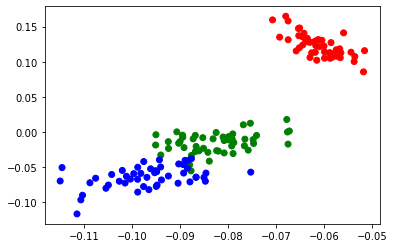

In [18]:
plt.scatter(u[:,0], u[:, 1], c=colores[clases])

Vemos que podemos separar mejor los valores y no se nos filtran tantos entre verdes y azules como antes!

Para más información sobre PCA, podemos ver un poco de Wikipedia: https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales